The aim of this project is to predict Parkinson's disease among patients based on their audio recordings

## Importing libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('parkinsons.data')
df.head()
#status is target variable

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Column explanation
Matrix column entries (attributes): <br>
name - ASCII subject name and recording number <br>
MDVP:Fo(Hz) - Average vocal fundamental frequency <br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency <br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency <br>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency <br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude <br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice <br>
status - Health status of the subject (one) - Parkinson's, (zero) - healthy <br>
RPDE,D2 - Two nonlinear dynamical complexity measures <br>
DFA - Signal fractal scaling exponent <br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

## Exploratory Data Analysis

In [5]:
df.shape

(195, 24)

In [9]:
df.info()
#There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Data Visualization

[Text(0, 0, 'Healthy'), Text(1, 0, 'Sick')]

<Figure size 500x500 with 0 Axes>

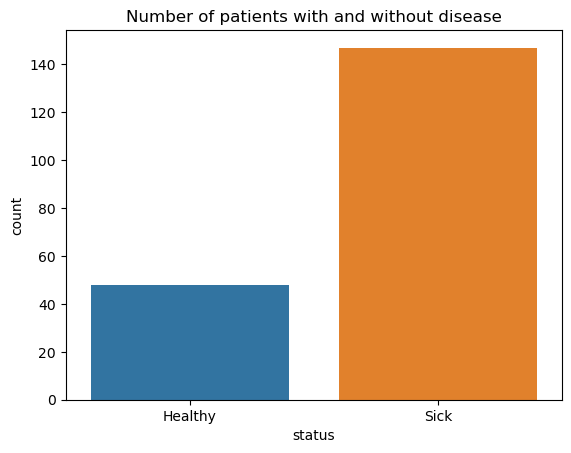

In [23]:
labels = ['Healthy', 'Sick']

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
sns.countplot(data=df, x='status')
plt.title('Number of patients with and without disease')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Healthy', 'Sick'])

[Text(0, 0, 'Healthy'), Text(1, 0, 'Sick')]

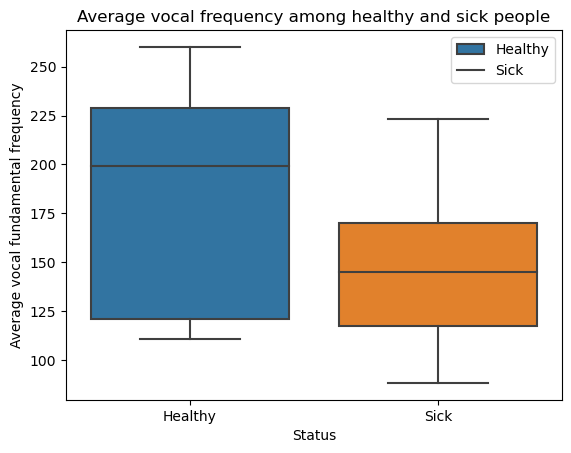

In [38]:
ax = sns.boxplot(data=df, x='status', y='MDVP:Fo(Hz)')
plt.legend(['Healthy', 'Sick'])
plt.title('Average vocal frequency among healthy and sick people')
plt.ylabel('Average vocal fundamental frequency')
plt.xlabel('Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Healthy', 'Sick'])


Healthy people average vocal frequency varies much more and is much higher than in case of people suffering from Parkinson's disease

[Text(0, 0, 'Healthy'), Text(1, 0, 'Sick')]

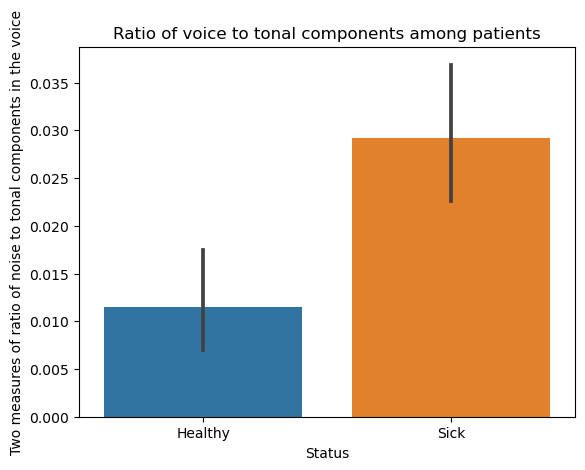

In [40]:
ax = sns.barplot(data=df, x='status', y='NHR')
plt.title('Ratio of voice to tonal components among patients')
plt.ylabel('Two measures of ratio of noise to tonal components in the voice')
plt.xlabel('Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Healthy', 'Sick'])

Tonal components in voice are prevalent among people sick with Parkinson's disease

## Feature engineering

In [41]:
df.drop(['name'], axis=1, inplace=True)
#dropping unnecessary columns

In [44]:
X = df.drop(['status'], axis=1)
y = df['status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression

In [89]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

log_accuracy = accuracy_score(y_test, log_pred)
log_matrix = confusion_matrix(y_test, log_pred)
recall_log = recall_score(y_test, log_pred)

print('Accuracy for Logistic Regression is: ' + str(log_accuracy))
print('Confusion Matrix for Logistic Regression:\n' + str(log_matrix))
print('Recall for Logistic Regression: ' +str(recall_log))

Accuracy for Logistic Regression is: 0.9183673469387755
Confusion Matrix for Logistic Regression:
[[ 8  3]
 [ 1 37]]
Recall for Logistic Regression: 0.9736842105263158


/Users/konrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

In [90]:
svc = SVC()

svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(y_test, svc_pred)
svc_matrix = confusion_matrix(y_test, svc_pred)
recall_svc = recall_score(y_test, svc_pred)

print('Accuracy for SVC is: ' + str(svc_accuracy))
print('Confusion Matrix for Support Vector Classifier:\n' + str(svc_matrix))
print('Recall for SVC: ' +str(recall_svc))

Accuracy for SVC is: 0.8571428571428571
Confusion Matrix for Support Vector Classifier:
[[ 4  7]
 [ 0 38]]
Recall for SVC: 1.0


## Decision Tree Classifier

In [91]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

tree_accuracy = accuracy_score(y_test, tree_pred)
tree_matrix = confusion_matrix(y_test, tree_pred)
recall_tree = recall_score(y_test, tree_pred)

print('Accuracy for Decision Tree Classifier is: ' + str(tree_accuracy))
print('Confusion Matrix for Decision Tree Classifier:\n' + str(tree_matrix))
print('Recall for Decision Tree Classifier: ' +str(recall_tree))

Accuracy for Decision Tree Classifier is: 0.8775510204081632
Confusion Matrix for Decision Tree Classifier:
[[ 9  2]
 [ 4 34]]
Recall for Decision Tree Classifier: 0.8947368421052632


## Random Forest Classifier

In [92]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
RF_pred =RF.predict(x_test)

RF_accuracy = accuracy_score(y_test, RF_pred)
RF_matrix = confusion_matrix(y_test, RF_pred)
recall_RF = recall_score(y_test, RF_pred)

print('Accuracy for Random Forest Classifier is: ' + str(RF_accuracy))
print('Confusion Matrix for Random Forest Classifier:\n' + str(RF_matrix))
print('Recall for Random Forest Classifier: ' +str(recall_RF))

Accuracy for Random Forest Classifier is: 0.9387755102040817
Confusion Matrix for Random Forest Classifier:
[[10  1]
 [ 2 36]]
Recall for Random Forest Classifier: 0.9473684210526315


## K Nearest Neighbors

In [93]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_matrix = confusion_matrix(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)

print('Accuracy for K Nearest Neighbors is: ' + str(knn_accuracy))
print('Confusion Matrix for K Nearest Neighbors:\n' + str(knn_matrix))
print('Recall for K Nearest Neighbors: ' +str(recall_knn))

Accuracy for K Nearest Neighbors is: 0.9387755102040817
Confusion Matrix for K Nearest Neighbors:
[[ 9  2]
 [ 1 37]]
Recall for K Nearest Neighbors: 0.9736842105263158


/Users/konrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Naive Bayes

In [94]:
NB = GaussianNB()

NB.fit(x_train, y_train)
NB_pred = NB.predict(x_test)

NB_accuracy = accuracy_score(y_test, NB_pred)
NB_matrix = confusion_matrix(y_test, NB_pred)
recall_NB = recall_score(y_test, NB_pred)

print('Accuracy for Naive Bayes is: ' + str(NB_accuracy))
print('Confusion Matrix for Naive Bayes:\n' + str(NB_matrix))
print('Recall for Naive Bayes: ' +str(recall_NB))

Accuracy for Naive Bayes is: 0.6530612244897959
Confusion Matrix for Naive Bayes:
[[11  0]
 [17 21]]
Recall for Naive Bayes: 0.5526315789473685


## Conclusion

We want to focus on models that had the best accuracy and the rate of true positives i.e. model that has the highest recall

In [99]:
summary = {'Name': ['Logistic Regression', 'SVM', 'Decision Tree Classifier',
           'Random Forest Classifier', 'K Nearest Neighbors', 'Naive Bayes'],
          'Accuracy': [log_accuracy, svc_accuracy, tree_accuracy,
           RF_accuracy, knn_accuracy, NB_accuracy],
          'Recall': [recall_log, recall_svc, recall_tree, recall_RF, recall_knn, recall_NB]}

summary_df = pd.DataFrame(summary)
summary_df

,Name,Accuracy,Recall
0,Logistic Regression,0.918367,0.973684
1,SVM,0.857143,1.000000
2,Decision Tree Classifier,0.877551,0.894737
3,Random Forest Classifier,0.938776,0.947368
4,K Nearest Neighbors,0.938776,0.973684
5,Naive Bayes,0.653061,0.552632


Model that performs best on a given data is K Nearest Neighbors with accuracy of 94% and recall 97%. The worst performing model is Naive Bayes with 65% accuracy and 55% recall